# Pixelate an image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import os
import PIL.Image as pil

ผลลัพธ์ที่ได้จากการทดลองนี้คือการทำ pixelate ให้กับภาพ โดยการแทนที่แต่ละ pixel ด้วยค่าเฉลี่ยของ pixel ในรูปสี่เหลี่ยมที่มีขนาด `n` รอบ pixel ที่ถูกแทนที่ โดยขนาดของสี่เหลี่ยม (kernel) นั้นจะถูกกำหนดโดยขนาดที่แตกต่างกันไป

In [2]:
def ImgSize(img):
    return [img.shape, img.size, img.dtype]

In [3]:
def pixelate(img, w, h):
    # Get input size
    height, width = img.shape[:2]

    # Resize input to "pixelated" size
    temp = cv2.resize(src = img, dsize=(w, h), interpolation=cv2.INTER_LINEAR)
    resizeinfo = ImgSize(temp)

    # resize back to original size using NEAREST NEIGHBOR
    output = cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)

    return output , resizeinfo

In [4]:
def plot_images(images, titles, rows, cols , info):
    fig = plt.figure(figsize=(20, 10))
    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.text(0.5, 0.5, info[i], fontsize=10, color='black', ha='left', va='top')
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

In [5]:
# Input image
req = urllib.request.urlopen('https://github.com/AthimetA/FRA321/blob/main/IMGpro/img/lucy.jpg?raw=true')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) 

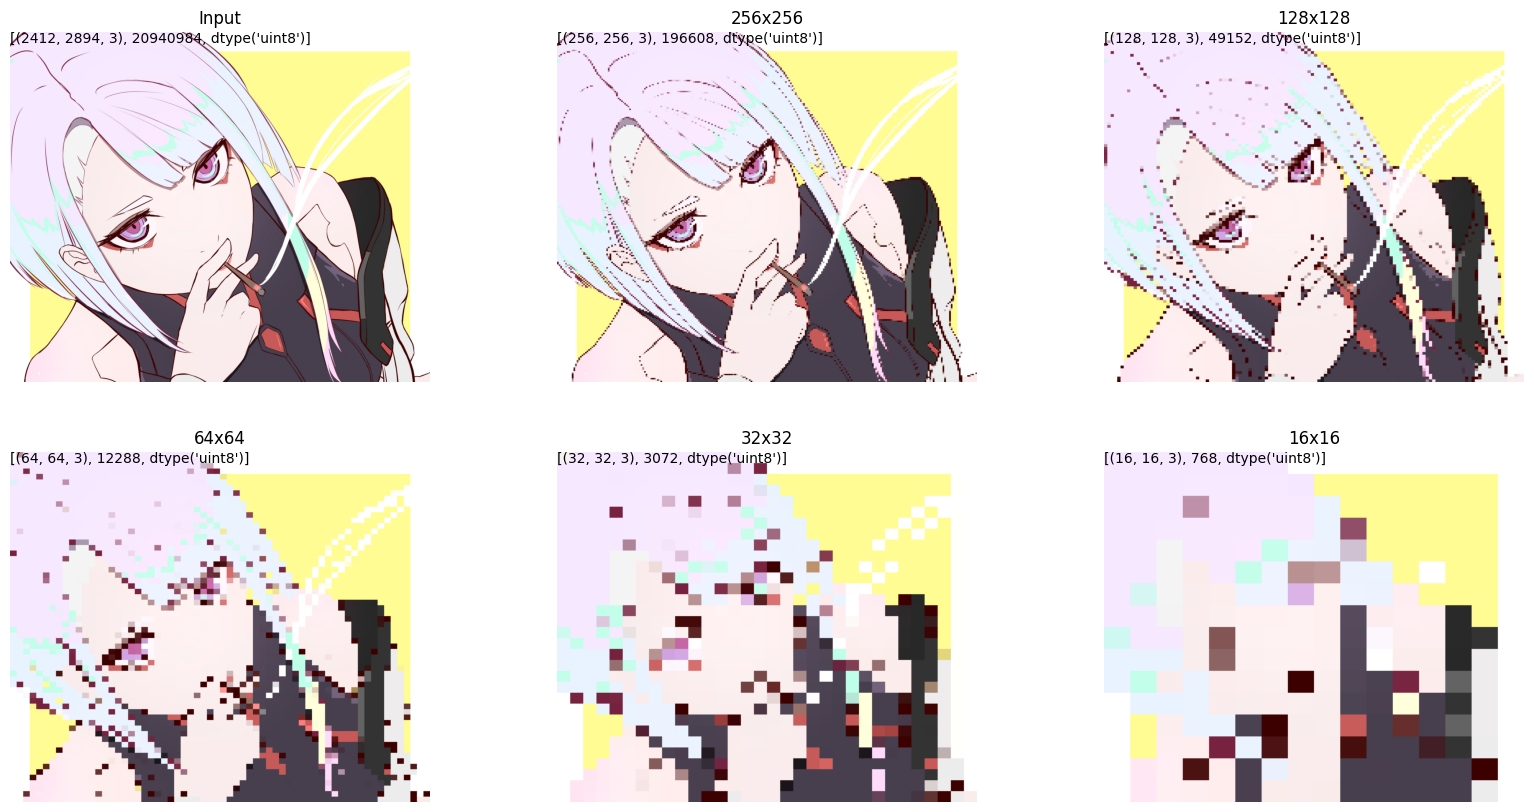

In [6]:
inputsize = ImgSize(img)

# Pixelate input
output256, resize256 = pixelate(img, 256, 256)
output128, resize128  = pixelate(img, 128, 128)
output64, resize64 = pixelate(img, 64, 64)
output32, resize32 = pixelate(img, 32, 32)
output16, resize16 = pixelate(img, 16, 16)

# Display input and output
images = [img, output256, output128, output64, output32, output16]
titles = ['Input', '256x256', '128x128', '64x64', '32x32', '16x16']
info = [inputsize, resize256, resize128, resize64, resize32, resize16]
plot_images(images, titles, 2, 3, info)


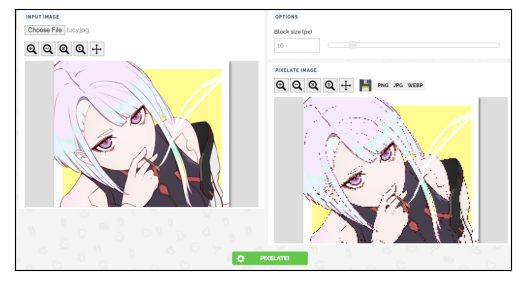

In [9]:
# Input image
req = urllib.request.urlopen('https://github.com/AthimetA/FRA321/blob/main/IMGpro/img/pinetools1.png?raw=true')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
imgpine1 = cv2.imdecode(arr, -1) 
plt.imshow(cv2.cvtColor(imgpine1, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

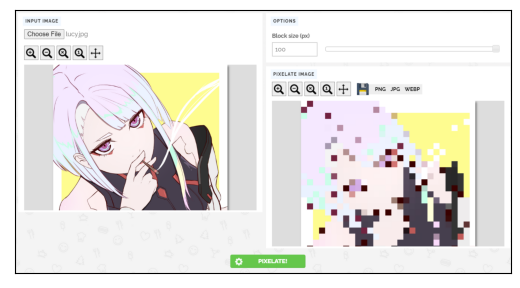

In [10]:
# Input image
req = urllib.request.urlopen('https://github.com/AthimetA/FRA321/blob/main/IMGpro/img/pinetools2.png?raw=true')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
imgpine2 = cv2.imdecode(arr, -1) 
plt.imshow(cv2.cvtColor(imgpine2, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# Conclusion

รูปภาพหลังจากการทำ pixelate จะมีขนาดเล็กกว่ารูปภาพต้นฉบับ ถ้าการทำ pixelate นั้นทำด้วย kernel ที่มีขนาดที่เล็กเกินไป รูปภาพจะถูกทำให้ pixelate มากเกินไปและจะสูญเสียรายละเอียดไปมาก แต่ถ้าการทำ pixelate ทำด้วย kernel ที่มีขนาดที่ใหญ่เกินไป รูปภาพจะมีการ pixelate เพียงเล็กน้อยและไม่ค่อยจะสูญเสียรายละเอียด(มีความคล้ายคลึงกับรูปภาพต้นฉบับ) เช่น ภาพที่ถูก pixelate ให้มีขนาด 16x16 หรือ 32x32 สูญเสียรายละเอียดไปมากจนทำให้ไม่สามารถมองให้เหมือนภาพต้นฉบับได้ แต่ภาพที่ถูก pixelate ให้มีขนาด 64x64 ขึ้นไป สูญเสียรายละเอียดไปเพียงเล็กน้อยและยังคงมองเห็นรายละเอียดได้คล้ายคลึงกับภาพต้นฉบับ